In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

print(data.isnull().sum())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(data.drop('MedHouseVal', axis=1))
X = pd.DataFrame(features_scaled, columns=california.feature_names)
y = data['MedHouseVal']

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


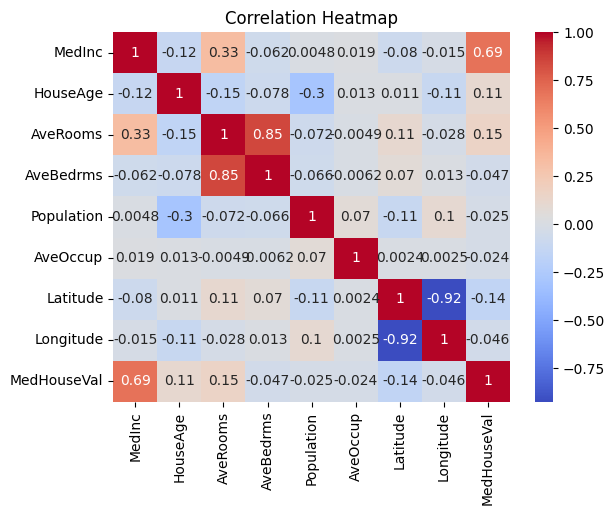

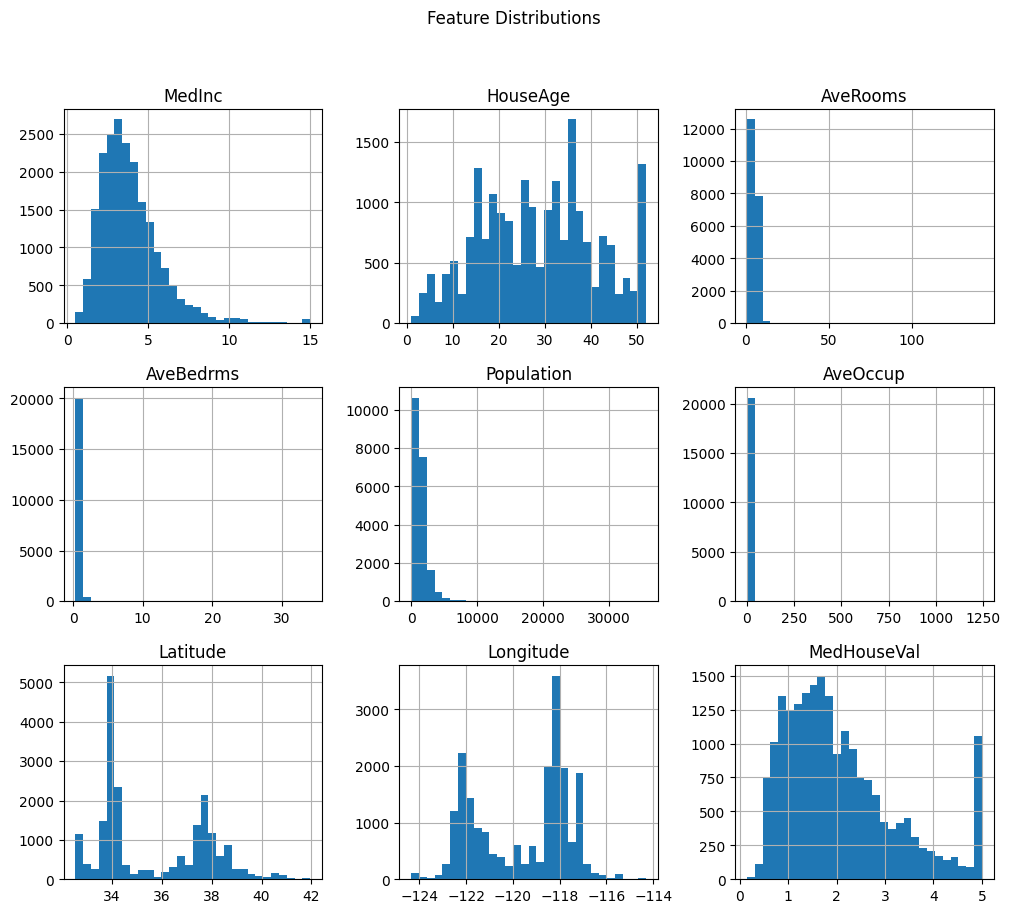

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

data.hist(bins=30, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

predictions = {}
for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(X)
    predictions[name] = preds

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

evaluation = []

for name, preds in predictions.items():
    mse = mean_squared_error(y, preds)
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)
    evaluation.append((name, mse, mae, r2))

results_df = pd.DataFrame(evaluation, columns=["Model", "MSE", "MAE", "R2 Score"])
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MSE,MAE,R2 Score
1,Decision Tree,9.555001e-32,4.156882e-17,1.000000
2,Random Forest,3.399707e-02,1.190509e-01,0.974468
3,Gradient Boosting,2.618843e-01,3.562491e-01,0.803324
4,SVR,3.325683e-01,3.816318e-01,0.750240
0,Linear Regression,5.243210e-01,5.311644e-01,0.606233


In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
param_grids = {
    'Linear Regression': {},  # No hyperparameters to tune for basic LinearRegression
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'SVR': {
        'kernel': ['rbf'],
        'C': [1, 10],
        'gamma': ['scale', 'auto']
    }
}

In [ ]:
base_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

In [ ]:
from sklearn.metrics import make_scorer, r2_score

best_models = {}
cv_results = []

for name, model in base_models.items():
    print(f"Tuning {name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='r2',
        cv=cv,
        n_jobs=-1
    )

    grid.fit(X, y)

    best_models[name] = grid.best_estimator_

    cv_results.append({
        'Model': name,
        'Best Parameters': grid.best_params_,
        'Best R2 Score (CV)': grid.best_score_
    })

Tuning Linear Regression...
Tuning Decision Tree...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning SVR...


In [ ]:
cv_results_df = pd.DataFrame(cv_results).sort_values(by='Best R2 Score (CV)', ascending=False)
print("Cross-Validation & Hyperparameter Tuning Results:")
display(cv_results_df)

Cross-Validation & Hyperparameter Tuning Results:


,Model,Best Parameters,Best R2 Score (CV)
3,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.821146
2,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.809535
4,SVR,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.760830
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.698855
0,Linear Regression,{},0.601378


Best model:
Gradient Boosting:- due to high R2, low error.
It capture non-linear relationships and less over-fitting due to ensemble methods.